In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Ganti 'CreditDataset.csv' dengan nama file dataset Anda
df = pd.read_csv('diabetes_dataset.csv')

# Lihat sekilas data
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8     

In [4]:
X = df.drop('Pregnancies', axis=1)  # kolom label
y = df['Glucose']  # Label klasifikasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Decision Tree Evaluation
Akurasi: 0.8376623376623377
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Classification Report:
              precision    recall  f1-score   support

          61       0.00      0.00      0.00         0
          62       0.00      0.00      0.00         1
          68       0.00      0.00      0.00         1
          71       0.00      0.00      0.00         1
          73       0.00      0.00      0.00         1
          74       0.00      0.00      0.00         3
          75       0.00      0.00      0.00         1
          77       0.00      0.00      0.00         1
          78       1.00      1.00      1.00         1
          80       1.00      1.00      1.00         2
          81       0.00      0.00      0.00         1
          82       0.00      0.00      0.00         0
          83       1.00      1.00      1.00         2
          84       1.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

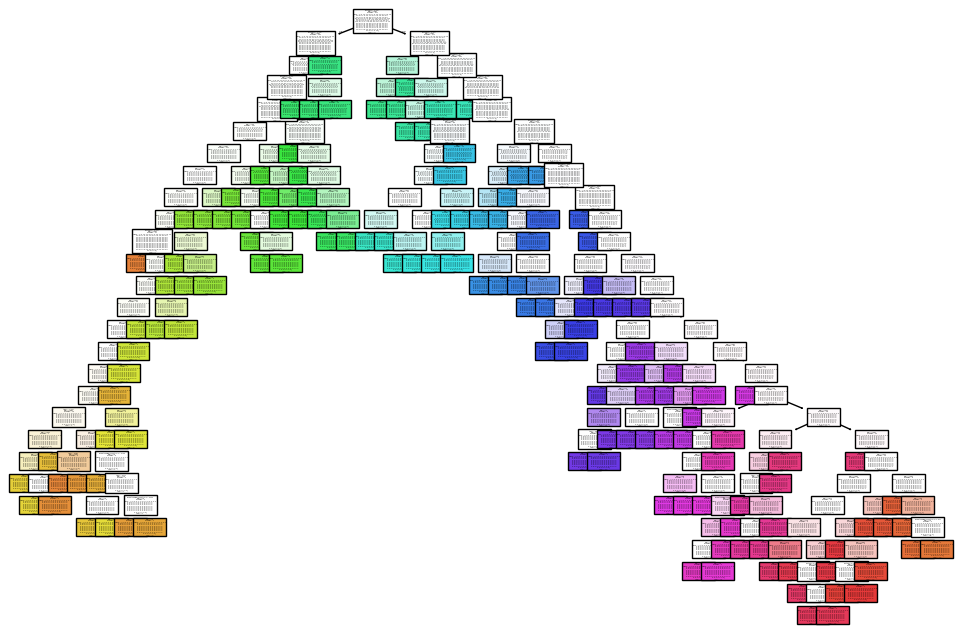

In [15]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Evaluation")
print(f"Akurasi: {accuracy_score(y_test, y_pred_dt)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

class_names = [str(c) for c in dt_model.classes_]
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # K dapat disesuaikan
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
y_pred_knn = knn_model.predict(X_test)

In [18]:
print("k-NN Evaluation")
print(f"Akurasi: {accuracy_score(y_test, y_pred_knn)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

k-NN Evaluation
Akurasi: 0.012987012987012988
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

          56       0.00      0.00      0.00         0
          62       0.00      0.00      0.00         1
          65       0.00      0.00      0.00         0
          68       0.00      0.00      0.00         1
          71       0.00      0.00      0.00         1
          72       0.00      0.00      0.00         0
          73       0.00      0.00      0.00         1
          74       0.00      0.00      0.00         3
          75       0.00      0.00      0.00         1
          76       0.00      0.00      0.00         0
          77       0.00      0.00      0.00         1
          78       0.00      0.00      0.00         1
          79       0.00      0.00      0.00         0
          80       0.00      0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [19]:
for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    print(f"K: {k}, Akurasi: {accuracy_score(y_test, y_pred)}")

K: 1, Akurasi: 0.025974025974025976
K: 2, Akurasi: 0.045454545454545456
K: 3, Akurasi: 0.01948051948051948
K: 4, Akurasi: 0.012987012987012988
K: 5, Akurasi: 0.012987012987012988
K: 6, Akurasi: 0.01948051948051948
K: 7, Akurasi: 0.01948051948051948
K: 8, Akurasi: 0.01948051948051948
K: 9, Akurasi: 0.012987012987012988
K: 10, Akurasi: 0.012987012987012988
K: 11, Akurasi: 0.012987012987012988
K: 12, Akurasi: 0.01948051948051948
K: 13, Akurasi: 0.01948051948051948
K: 14, Akurasi: 0.01948051948051948
K: 15, Akurasi: 0.01948051948051948
K: 16, Akurasi: 0.032467532467532464
K: 17, Akurasi: 0.01948051948051948
K: 18, Akurasi: 0.025974025974025976
K: 19, Akurasi: 0.025974025974025976
K: 20, Akurasi: 0.025974025974025976
